In [1]:
import tensorflow as tf
from tensorflow import keras
dataset = keras.datasets.fashion_mnist

In [2]:
((treino, classe_treino), (teste, classe_teste)) = dataset.load_data()
print('Treino: ', treino.shape)
print('Teste: ', teste.shape)

Treino:  (60000, 28, 28)
Teste:  (10000, 28, 28)


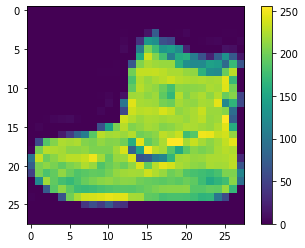

In [3]:
import matplotlib.pyplot as plt
plt.imshow(treino[0])
plt.colorbar()

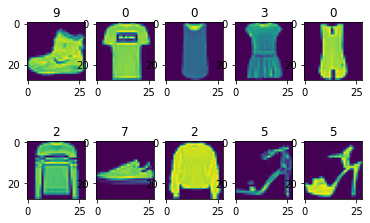

In [4]:
for imagem in range(10):
  plt.subplot(2, 5, imagem+1)
  plt.imshow(treino[imagem])
  plt.title(classe_treino[imagem])

In [5]:
nomes_classes = ['Camiseta', 'Calca', 'Pullover', 'Vestido', 'Casaco', 'Sandalia', 'Camisa', 'Tenis', 'Bolsa', 'Bota']

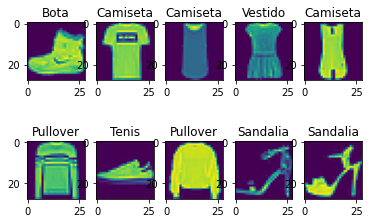

In [6]:
for imagem in range(10):
  plt.subplot(2, 5, imagem+1)
  plt.imshow(treino[imagem])
  plt.title(nomes_classes[classe_treino[imagem]])

In [7]:
treino = treino/255.0

modelo = keras.Sequential([keras.layers.Flatten(input_shape=(28,28)),
                           keras.layers.Dense(256, activation=tf.nn.relu),
                           keras.layers.Dropout(rate=0.2),
                           keras.layers.Dense(10, activation=tf.nn.softmax)])

In [8]:
modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])
historico = modelo.fit(treino, classe_treino, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5306 - accuracy: 0.8103 - val_loss: 0.4155 - val_accuracy: 0.8481
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3973 - accuracy: 0.8539 - val_loss: 0.3831 - val_accuracy: 0.8597
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3604 - accuracy: 0.8670 - val_loss: 0.3515 - val_accuracy: 0.8726
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3380 - accuracy: 0.8752 - val_loss: 0.3770 - val_accuracy: 0.8546
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3226 - accuracy: 0.8814 - val_loss: 0.3350 - val_accuracy: 0.8817


In [17]:
from tensorflow.keras.models import load_model
modelo.save('modelo.h5')
modelo_salvo = load_model('modelo.h5')

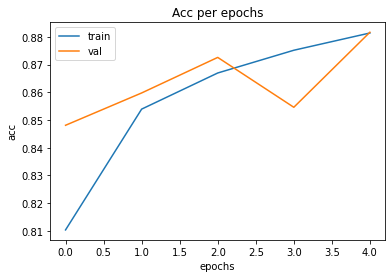

In [9]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acc per epochs')
plt.xlabel('epochs')
plt.ylabel('acc')
plt.legend(['train', 'val'])

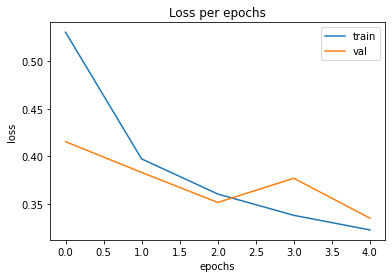

In [10]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Loss per epochs')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'val'])

In [18]:
teste = teste/255.0
predicoes = modelo.predict(teste)
predicoes_modelo_salvo = modelo_salvo.predict(teste)

In [20]:
import numpy as np
print('Resultado previsto: ', np.argmax(predicoes[0]))
print('Resultado esperado: ', classe_teste[0])

print('Resultado previsto: ', np.argmax(predicoes_modelo_salvo[0]))
print('Resultado esperado: ', classe_teste[0])

Resultado previsto:  5
Resultado esperado:  9
Resultado previsto:  5
Resultado esperado:  9


In [13]:
loss_teste, acc_teste = modelo.evaluate(teste, classe_teste)
print('Loss:' , loss_teste)
print('Acc:', acc_teste)

313/313 [==============================] - 1s 2ms/step - loss: 0.3619 - accuracy: 0.8705
Loss: 0.3618820905685425
Acc: 0.8705000281333923
